In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import math
import random
import statistics
from math import floor

# Statistics Exercise
## Statistical Distributions. Properties of distributions. Applications of Probability and Statistics in Computer Science

### Problem 1. Plotting a Single Distribution. Digits in $\pi$ and $e$
We expect that the decimal digits in $\pi$ and $e$ will be randomly distributed and there's no reason for any digit to dominate over others. Let's verify this.

Using an algorithm, the first 10 004 digits of $\pi$ and $e$ were generated:
$$
\pi = 3.(141592 \dots 5678)5667
$$
$$
e = 2.(718281 \dots 6788)5674
$$

The 10 000 digits in brackets were counted. You can see the results in `digits.dat`. Each column corresponds to one digit from 0 to 9. The first row is for $\pi$ and the second row is for $e$.

How are these digits distributed? Are the two distributions different?

**Note:** The dataset is **not properly formatted** to work easily. You can transpose it. Now, digit counts will be in rows and variables - in columns. 
```python
digits = pd.read_table("digits.dat", header = None).T
```

You can also specify column names like this:
```python
digits.columns = ["pi", "e"]
```

Also note that **we are not creating the histogram of the distribution**. We already have the counts, we need to plot them. In a sense, the histogram has already been calculated.

To do this, we can create a "bar chart" (using `plt.bar()`). We have to provide values for the x-axis and y-axis. For the x-axis, we have the numbers 0 through 9 (we can use the *index* of the dataset like this: `digits.index`). For the y-axis, we need to plot the digit counts directly.

We can see that even the simplest datasets sometimes need a bit of preprocessing. This is always the case when we're working with data.

In [3]:
digits = pd.read_table("digits.dat", header = None).T
digits.columns = ["pi", "e"]

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Jerry\AppData\Local\Temp\ipykernel_22460\4073922376.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Digits of $\pi$ – distribution")


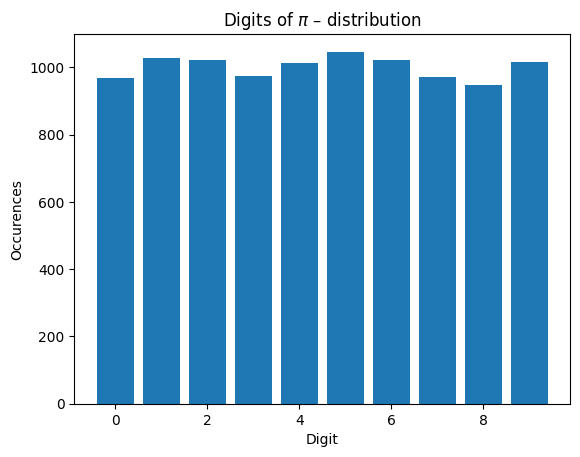

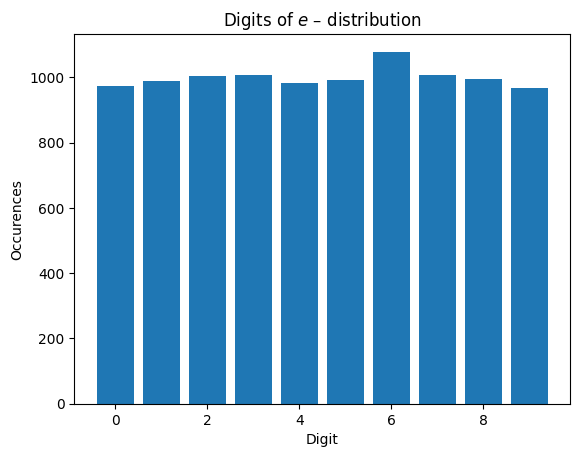

In [4]:
xs = np.array(digits.index)
pi_ys = np.array(digits["pi"])
e_ys = np.array(digits["e"])

plt.bar(xs, pi_ys)
plt.title("Digits of $\pi$ – distribution")

plt.xlabel("Digit")
plt.ylabel("Occurences")

plt.show()

plt.bar(xs, e_ys)
plt.title("Digits of $e$ – distribution")

plt.xlabel("Digit")
plt.ylabel("Occurences")

plt.show()

Let's try something else. Scientists have measured the percentage of silica ($\text{SiO}_2$, sand / glass) for 22 meteors. You can find it in `silica.dat`. How are these distributed? What is a "typical" percentage? Is there such percentage at all?

Print the mean, standard deviation (you can use the biased or unbiased formula), skewness and kurtosis of the distribution. What do these numbers tell you? How do they relate to the shape of the distribution? Can you characterize the distribution better? (An idea would be to characterize different parts of it on their own, as if they're different distributions.)

Mean: 29.17
Standard deviation: 4.19
Skewness: -0.45
Kurtosis: -0.92


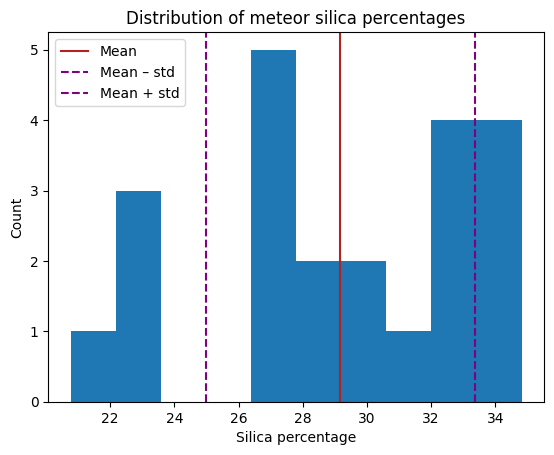

In [5]:
silicat_data = pd.read_table("silica.dat", header=None)
ys = silicat_data[0].values

mean = ys.mean()
std  = ys.std()         
skew = silicat_data[0].skew()
kurt = silicat_data[0].kurt()

print(f"Mean: {mean:.2f}")
print(f"Standard deviation: {std:.2f}")
print(f"Skewness: {skew:.2f}")
print(f"Kurtosis: {kurt:.2f}")

plt.hist(ys)

plt.axvline(mean, label="Mean", color="firebrick")
plt.axvline(mean - std, label="Mean – std", color="purple", linestyle="--")
plt.axvline(mean + std, label="Mean + std", color="purple", linestyle="--")

plt.xlabel("Silica percentage")
plt.ylabel("Count")

plt.title("Distribution of meteor silica percentages")
plt.legend()
plt.show()

### Problem 2. Categorical Variables. Comparing Categories
In addition to numeric variables (like age and salary), in statistics we also use **categorical variables**. These are descriptions of quality (as opposed to quantity). Such variables can be gender, smoker / non-smoker, results of a medical study (healthy / not healthy), colors (red, green, blue), etc. To plot values of categories, we use *bar charts*. Since category names can be long, it's sometimes useful to plot the lines horizontally.

<p style="color: #d9534f"><strong>There is a very significant difference between histograms and bar charts. Histograms are used to plot the frequency distribution of one numeric variable. Bar charts are used to plot categorical variables - how each value compares to other values.</strong></p>

The dataset `budget.dat` contains the figures for the eight main items in the US budget for 1978 and 1979 in billions
of dollars.

Display the two budgets separately. Use `xlabel()` (or `ylabel()` if your plot is horizontal) to write the names of each category. You can use [this](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) and [this](https://matplotlib.org/examples/pylab_examples/barchart_demo2.html) examples as a guide.

Create another variable which shows the difference in budget $\Delta b = b_{1979} - b_{1978}$. Add this variable to the dataset (find out how). Plot it. How does the budget differ?

Since the numbers are different, a better comparison will be if we convert them to percentages of the total budget. Create two more variables for 1978 and 1979 and add them to the dataset. Plot these now. Also plot the difference in percentage, like you did before.

In [6]:
budget_data = pd.read_table("budget.dat")

In [7]:
budget_data["diff_abs"] = budget_data["1979"] - budget_data["1978"]
total_1978 = budget_data["1978"].sum()
total_1979 = budget_data["1979"].sum()
budget_data["percentage_1978"] = budget_data["1978"] / total_1978 * 100
budget_data["percentage_1979"] = budget_data["1979"] / total_1979 * 100
budget_data["difference_percents"] = budget_data["percentage_1979"] - budget_data["percentage_1978"]

In [8]:
def plot_barh(series, xlabel, title):
    """
    Helper function for plotting barh
    """
    
    plt.figure()
    plt.barh(budget_data.Category, series)
    plt.xlabel(xlabel)
    plt.ylabel("Category")
    plt.title(title)
    plt.tight_layout()
    plt.show()

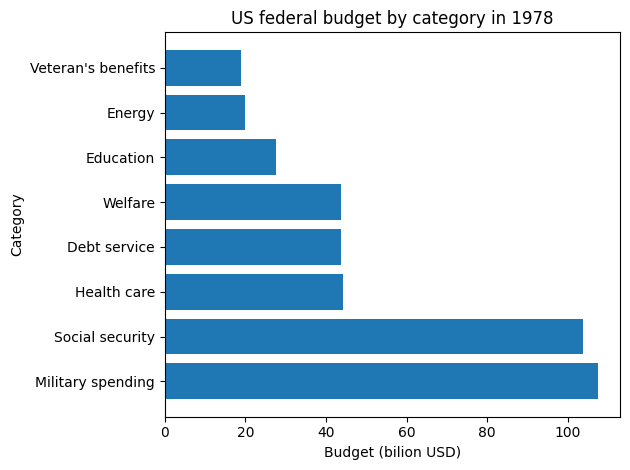

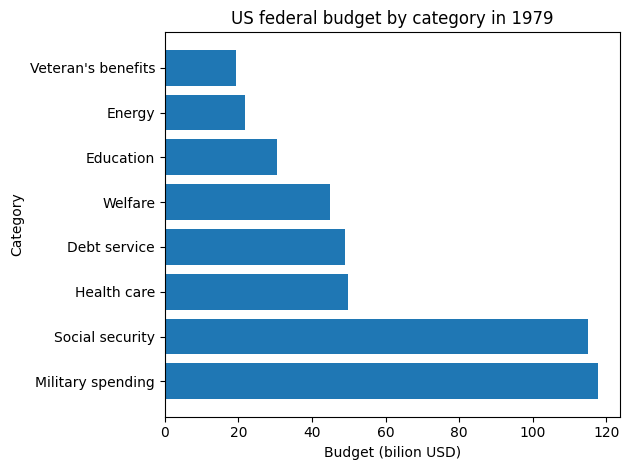

In [9]:
plot_barh(budget_data["1978"], "Budget (bilion USD)",
          "US federal budget by category in 1978")

plot_barh(budget_data["1979"], "Budget (bilion USD)",
          "US federal budget by category in 1979")

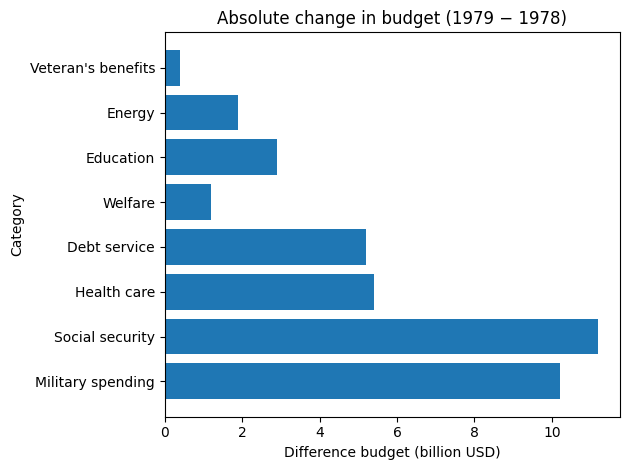

In [10]:
plot_barh(budget_data["diff_abs"],
          "Difference budget (billion USD)",
          "Absolute change in budget (1979 − 1978)")

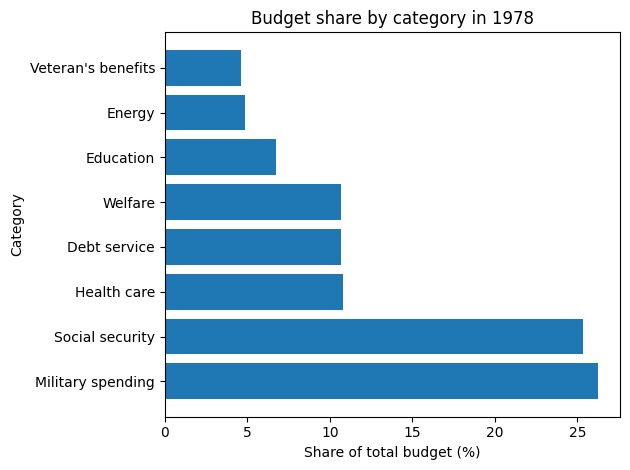

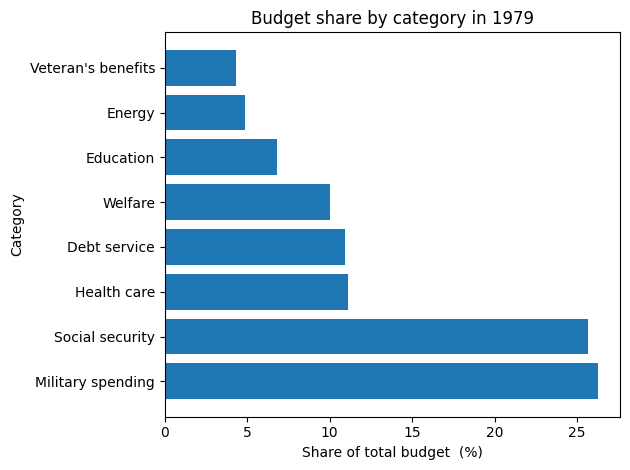

In [11]:
plot_barh(budget_data["percentage_1978"], "Share of total budget (%)",
          "Budget share by category in 1978")

plot_barh(budget_data["percentage_1979"], "Share of total budget  (%)",
          "Budget share by category in 1979")

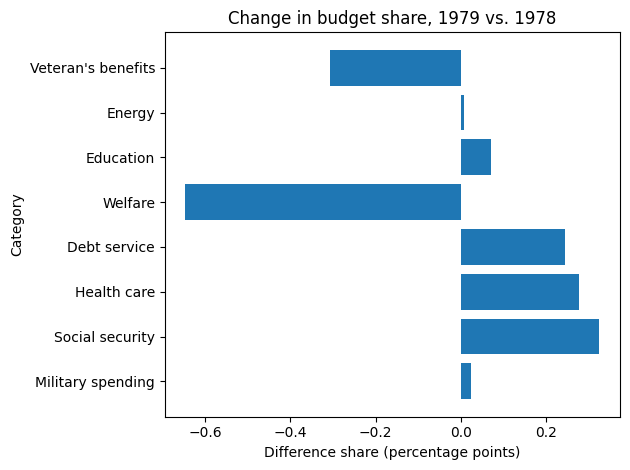

In [12]:
plot_barh(budget_data["difference_percents"], "Difference share (percentage points)",
          "Change in budget share, 1979 vs. 1978")

### Problem 3. Correlations between Variables. Alcohol and Tobacco Usage
The dataset `alcohol_tobacco.dat` shows the average weekly household spending, in British pounds, on tobacco products and alcoholic beverages for each of the 11 regions of Great Britain.

Create a scatter plot. Print the correlation coefficient. You can use the **correlation matrix** (find out how).

There's a major outlier. Which one is it?

Remove the outlier from the dataset (find out how). Calculate the correlation coefficient once again. It should be much higher.

This example is useful to show what an outlier is, and how an outlier can influence the results of an experiment.

**Note:** Be careful with outliers. Sometimes they indicate human error (e.g. human height 1588 cm is obviously wrong) but sometimes they indicate important patterns in the data. Should you remove, replace, or leave them is a difficult question and should be answered separately for each dataset.

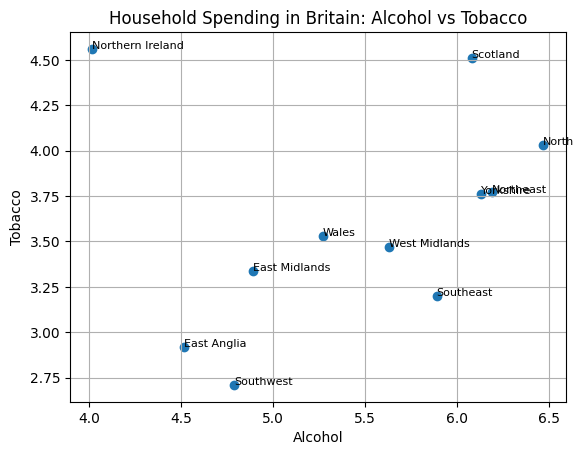

Correlation matrix:
          Alcohol   Tobacco
Alcohol  1.000000  0.223572
Tobacco  0.223572  1.000000

Correlation coefficient: 0.2236


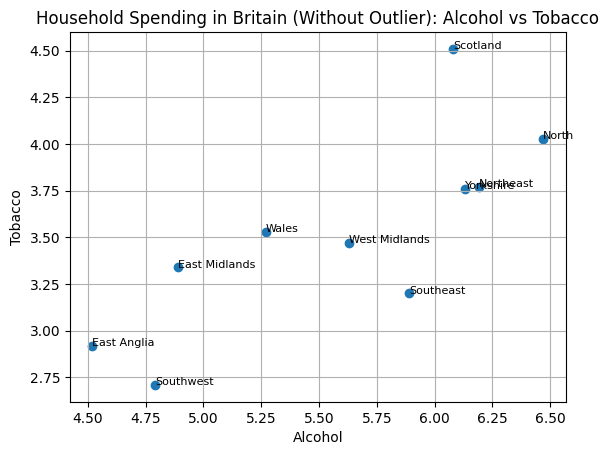

New Correlation matrix:
          Alcohol   Tobacco
Alcohol  1.000000  0.784287
Tobacco  0.784287  1.000000

New Correlation coefficient: 0.7843


In [13]:
alcohol_tobacco_data = pd.read_table("alcohol_tobacco.dat")

alcohol = alcohol_tobacco_data.Alcohol
tobacco = alcohol_tobacco_data.Tobacco

plt.figure()
plt.scatter(alcohol, tobacco)

for x, y, region in zip(alcohol, tobacco, alcohol_tobacco_data.Region):
    plt.text(x, y, region, fontsize=8)
    
plt.xlabel("Alcohol")
plt.ylabel("Tobacco")

plt.title('Household Spending in Britain: Alcohol vs Tobacco')
plt.grid(True)

plt.show()

corr_matrix = pd.concat([alcohol, tobacco], axis=1).corr()
print("Correlation matrix:")
print(corr_matrix)
print()
print(f"Correlation coefficient: {alcohol.corr(tobacco):.4f}")

new_regions_mask = alcohol_tobacco_data.Region != 'Northern Ireland'

new_alcohol = alcohol[new_regions_mask]
new_tobacco = tobacco[new_regions_mask]
new_regions = alcohol_tobacco_data.Region[new_regions_mask]

plt.figure()
plt.scatter(new_alcohol, new_tobacco)

for x, y, region in zip(alcohol, tobacco, new_regions):
    plt.text(x, y, region, fontsize=8)

plt.xlabel("Alcohol")
plt.ylabel("Tobacco")

plt.title('Household Spending in Britain (Without Outlier): Alcohol vs Tobacco')
plt.grid(True)

plt.show()

new_corr_matrix = pd.concat([new_alcohol, new_tobacco], axis=1).corr()
print("New Correlation matrix:")
print(new_corr_matrix)
print()
print(f"New Correlation coefficient: {new_alcohol.corr(new_tobacco):.4f}")

### Problem 4. Simulation
Another prediction technique based on statistics, is simulation. This means recreating a system's parameters and running the experiment on a computer instead of running it in real life. Simulation can give us many insights. It's useful for prediction, "what-if" analysis, etc. It's also very useful if we have very limited "real experimentation" resources and want to narrow down our possibilities.

Let's see how we can simulate the profit of a grocery shop.

The profit is dependent on the customers and what items they buy. Let's assume that the number of customers per months follows a normal distribution with mean 500 and standard deviation 20.

$$ C \sim N(500, 20) $$

In the shop, there are several items, each having a different popularity. The popularity represents the probability of buying each item.

| Item               | Price | Popularity |
|--------------------|-------|------------|
| Bread              | 0.99  | 0.5        |
| Milk               | 2.89  | 0.15       |
| Eggs, dozen        | 2.00  | 0.2        |
| Chicken fillet, kg | 6.39  | 0.15       |

Each customer buys *exactly one* article at random. Each customer will generate an expected profit equal to $\text{price} . \text{popularity}$. Total profit: sum of all profits.

In [14]:
def get_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return 0.99
    elif n < 0.65:
        return 2.89
    elif n <= 0.85:
        return 2
    else:
        return 6.39

In [15]:
days = 1000
def run_simulation():
    profits = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_customer_profit() for c in np.arange(customers)])
        profits.append(profit)
    return profits

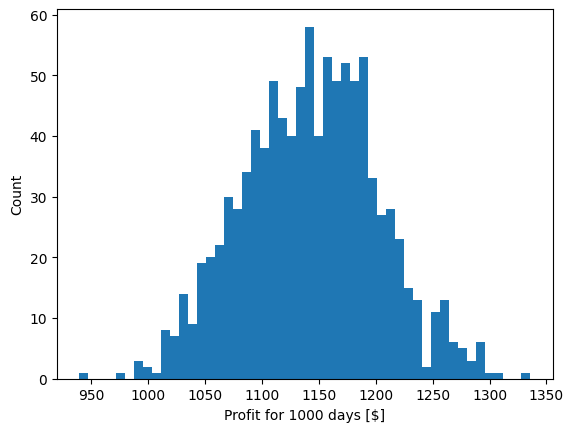

In [16]:
profits = run_simulation()
plt.hist(profits, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

Now we can answer questions like:
* What's the probability of profit less than \$1100? 
* What's the probability of profit between \$1300 and \$1400?

We can also change our model. Let's suppose now that one customer can take 1, 2 or 3 items, with probabilities 0.5, 0.3 and 0.2 respectively. The picked items are independent. How does this change the distribution?

In [17]:
def get_customer_profit_many_items(items = 1):
    customer_sum = sum([get_customer_profit() for i in range(items)])
    return customer_sum

def get_total_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return get_customer_profit_many_items(1)
    elif n <= 0.8:
        return get_customer_profit_many_items(2)
    else:
        return get_customer_profit_many_items(3)

In [18]:
def run_simulation_many_items():
    days = 1000
    profits_many_items = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_total_customer_profit() for c in np.arange(customers)])
        profits_many_items.append(profit)
    return profits_many_items

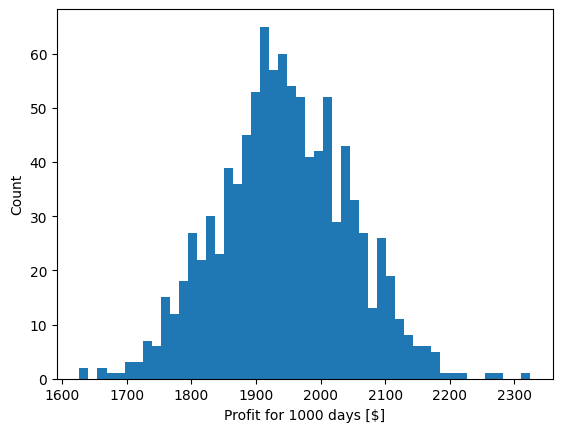

In [19]:
profits_many_items = run_simulation_many_items()
plt.hist(profits_many_items, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

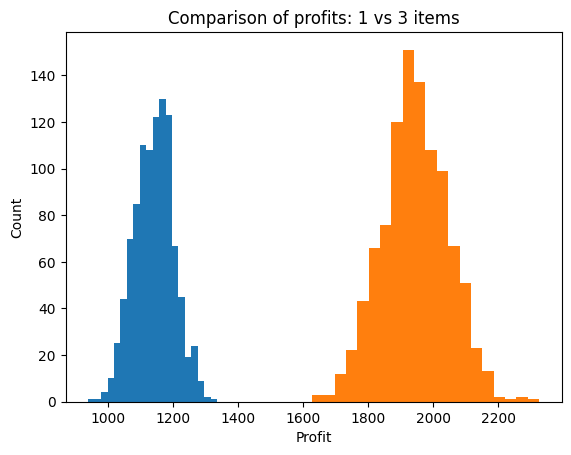

In [20]:
plt.title("Comparison of profits: 1 vs 3 items")
plt.hist(profits, bins = 20)
plt.hist(profits_many_items, bins = 20)
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

### ** Problem 5. Monte Carlo Simulation
One common technique to apply simulations is called **Monte Carlo simulation**. It's similar to the simulation from the previous example. The main idea is to use random sampling to solve deterministic problems.

Research what these simulations are. Give examples. Implement at least one case of a Monte Carlo simulation. You can use the following checklist to help with your research and work:
* What is a simulation?
    * How is simulation used in science?
    * Why is a simulation useful?
* How are statistics useful in simulation? How can we simulate unknown, random processes?
* What is a Monte Carlo simulation (also known as "Monte Carlo method")?
* A common use of Monte Carlo methods is numeric integration
    * Define the problem. Propose the solution. Implement it and test with some common functions
    * How does this method compare to other methods, e.g. the trapezoidal rule? Compare the performance (accuracy and time to execute) of both methods
* Apply Monte Carlo simulation to a real-life system. There are many examples. You can see [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications) or some other resource for inspiration.

### Simulations, Monte Carlo Simulations and Numeric Integration

#### Abstract

Simulation is a powerful computational technique for studying complex systems when traditional experiment or analytic solution is difficult or impossible. In this article, we begin by defining what a simulation is and how it is used across scientific fields and why it offers safe, repeatable, and cost-effective "virtual experiments". Focusing on Monte Carlo methods, we explain the core idea of turning integrals and uncertain models into sampling problems, and walk through a numerical-integration examples. Finally, we demonstrate a simple real-life application - forecasting monthly profit in a small shop with uncertain customer counts and purchase behavior - showing how Monte Carlo simulation delivers not just average outcomes but full risk profiles.

#### 1. Simulations

A simulation is a computer‐based (or mathematical) model that imitates the behavior of a real-world system over time. Instead of experimenting on the real thing - where that might be expensive, dangerous, or simply impossible - we build a simplified digital system that follows the same basic rules, let it run, and observe the outcomes.

Simulations have many usages in science. Firstly, they are used in Physics and Astronomy where we could simulate galaxy collisions, black-hole dynamics, or particle interactions where direct experimentation isn't feasible. Also, they are used in Biology and Epidemiology - we could model how a virus spreads through a population under different vaccination rates or social‐distancing policies, in Engineering - testing the safety of structures (bridges, airplanes) under extreme loads or wind conditions without destroying real hardware.

Simulations are very useful - they are safe and ethical, it is cheap - running a code on our laptop is far cheaper and faster than building a physical prototype or waiting decades for real‐world data, we have a big control over our data, etc. 

#### 2. Statistics in simulations

Statistics lie at the heart of nearly every simulation because they give us the tools to model, generate, and analyze randomness in a principled way. Every uncertain quantity in our simulation - whether it's the number of customers in a month, the time between bus arrivals, or the damage in a storm - gets represented by a probability distribution. Once we have decided on a distribution, we need a reliable way to draw random values from it. That's where statistical algorithms and random-number generators come in. With sampling in hand, we can perform Monte Carlo experiments - then, statistical summaries of the outputs (mean, variance, etc.) then tell us about expected performance and risk of extreme events. 

Sometimes we don't know the true distribution up front. Statistics still helps - Stochastic process models (like Markov chains, Poisson processes) capture dependencies over time or space, and we use statistical inference to fit those rules to data. 

#### 3. Monte Carlo Simulation

A Monte Carlo simulation (or Monte Carlo method) is a way to use random sampling to estimate the behavior of a complex system or calculate a numerical quantity that's hard to derive analytically. In essence, we turn our problem into a "virtual experiment" and let the computer roll the dice thousands - or millions - of times. It is called Monte Carlo ecause it is named after Monaco's famous casino, since the method relies on randomness (like spinning roulette wheels) to explore possibilities. It was pioneered in the 1940s by scientists such as Stanislaw Ulam and John von Neumann during the Manhattan Project. Steps:

1. We model our system with all the uncertain inputs represented as probability distributions.
2. We draw random samples for each input (one "scenario").
3. We run our deterministic (predictable) model once with those sampled inputs to get an output.
4. We repeat (step 2–3) many times to build up an empirical distribution of outputs.
5. We summarize the results (mean, variance, etc.)

#### 4. Numeric Integration

The problem occurs when we want to approximate the definite integral for functions where an analytic antiderivative may be difficult or impossible to obtain.

$$ I =  \int_a^b f(x)\,dx $$

Some solutions include:

The Trapezoidal rule - where we partition $[a,b]$ into $n$ equal subintervals of width $h = \frac{(b−a)}{n}$, approximate $f$ by straight lines on each. The formula is:

$$ I_{trap} = h\Bigl[\tfrac12\,f(a)\;+\;f(x_1)\;+\;\cdots\;+\;f(x_{n-1})\;+\;\tfrac12\,f(b)\Bigr],
\qquad h = \frac{b - a}{n} $$

Monte Carlo (MC) integration - we interpret the integral as an expectation.

$$ I_{MC} = (b - a)\,\mathbb{E}[f(U)], \quad U \sim \mathrm{Uniform}(a,b) $$

We draw $n $ independent samples $ x_i \sim Uniform(a,b) $ and estimate: 

$$ I_{MC} =  \frac{b - a}{n} \sum_{i=1}^n{f(x_i)} $$

In [21]:
def monte_carlo_integral(f, a, b, n):
    """
    Function for Monte Carlo integration
    """
    
    xs = np.random.rand(n) * (b - a) + a
    return (b - a) * np.mean(f(xs))

In [22]:
def trapezoidal_integral(f, a, b, n):
    """
    Function for applying Trapezoid rule
    """
    
    xs = np.linspace(a, b, n+1)
    ys = f(xs)
    h = (b - a) / n
    return h * (np.sum(ys) - 0.5 * (ys[0] + ys[-1]))

In [23]:
functions = [
    {'name':'x^2', 'f':lambda x: x**2, 'a':0, 'b':1, 'true_value': 1/3 },
    {'name':'sin(x)', 'f':lambda x: np.sin(x), 'a':0, 'b':np.pi, 'true_value': 2.0},
    {'name':'exp(x)', 'f':lambda x: np.exp(x), 'a':0, 'b':1, 'true_value': math.e - 1}
]

n_mc = 100000
n_trap = 100000

In [24]:
header_fmt = "{:<10} {:>10} {:>15} {:>10} {:>15} {:>10}"
row_fmt = "{:<10} {:>10.6f} {:>15.6f} {:>10.4f}s {:>15.6f} {:>10.4f}s"

header_line = header_fmt.format(
    "Func", "True", "MC_Est", "MC_Time", "Trap_Est", "Trap_Time"
)

print(header_line)
print("-" * len(header_line))

for func in functions:
    name = func['name']
    f, a, b  = func['f'], func['a'], func['b']
    true_val = func['true_value']

    start = time.perf_counter()
    mc_est = monte_carlo_integral(f, a, b, n_mc)
    mc_time = time.perf_counter() - start

    start = time.perf_counter()
    trap_est = trapezoidal_integral(f, a, b, n_trap)
    trap_time = time.perf_counter() - start

    print(row_fmt.format(
        name,
        true_val,
        mc_est,
        mc_time,
        trap_est,
        trap_time
    ))

Func             True          MC_Est    MC_Time        Trap_Est  Trap_Time
---------------------------------------------------------------------------
x^2          0.333333        0.332506     0.0009s        0.333333     0.0003s
sin(x)       2.000000        1.999200     0.0015s        2.000000     0.0005s
exp(x)       1.718282        1.716784     0.0009s        1.718282     0.0005s


In summary, for one-dimensional integrals the trapezoidal rule delivers near–machine precision in a fraction of the time that Monte Carlo takes. 

#### 5. Real-life example

Imagine you run a small grocery shop. In any given month, you don't know exactly how many customers will walk in, nor precisely what each will buy. You do know from past data that customer counts hover around 500 (with a typical swing of about 20), and that each visitor picks one of four items - bread, milk, eggs, or chicken - with known probabilities. Monte Carlo simulation lets you combine those uncertainties into a single experiment that forecasts your total monthly profit.

First, you decide how to model each source of randomness. You assume the number of customers $N$ in a month follows a Normal distribution with mean 500 and standard deviation 20. For each of those $N$ customers, you represent their choice by sampling one item at random according to its "popularity" probability (for example, a 50% chance of buying bread, 15% for milk, and so on). Each purchase immediately converts to revenue by multiplying the drawn item’s price by one.

Next, you run the simulation. One “trial” goes like this: draw a random $N$, then simulate $N$ independent purchases, summing up the prices to compute that trial’s total profit. You repeat this process-say 10 000 times-each trial with fresh random numbers. At the end, you have an array of 10 000 profit figures, each representing one plausible month under the assumptions you made.

Finally, you analyze the compiled outcomes. The average of all simulated profits gives your best estimate of expected monthly revenue. Looking at the 10th percentile tells you how low a “bad” month might realistically go, and the 90th percentile shows the optimistic side. You can even calculate the probability of exceeding a target (for instance, the fraction of trials above £1200) so you know how often you’re likely to hit your goal.

In [25]:
items = [('Bread',0.99,0.50),
         ('Milk',2.89,0.15),
         ('Eggs',2.00,0.20),
         ('Chicken',6.39,0.15)]

In [26]:
def one_month_profit():
    """
    Function to evaluate the profit in one month
    """
    
    N = max(0, int(random.gauss(500, 20)))
    profit = 0.0
    
    for n in range(N):
        r = random.random()
        cummulative = 0
        for name, price, p in items:
            cummulative += p
            if r < cummulative:
                profit += price
                break
    return profit

In [27]:
M = 100000
profits = [one_month_profit() for m in range(M)]

print("Expected profit: £", round(statistics.mean(profits),2))
print("10th percentile: £", round(sorted(profits)[int(0.1*M)],2))
print("90th percentile:  £", round(sorted(profits)[int(0.9*M)],2))
print("P(profit > 1200): ", 
      round(sum(p > 1200 for p in profits) / M, 3))

Expected profit: £ 1142.43
10th percentile: £ 1063.98
90th percentile:  £ 1221.49
P(profit > 1200):  0.175


#### 6. Conclusion

In summary, simulation lets us turn complex, uncertain systems into repeatable "virtual experiments" with statistics guiding how we model and sample randomness. Monte Carlo methods are especially valuable when analytic or grid‐based approaches break down-offering straightforward code that delivers not only average predictions but full distributions of possible outcomes. By choosing the right method for the task (deterministic quadrature in simple cases, Monte Carlo in high‐dimensional or irregular settings), you gain both precision and insight into the risks and extremes that drive real‐world decisions.